In [82]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline
os.chdir('D:\Simplilearn Goal\Machine Learning course\Demo Datasets\Lesson 7\Lesson 7-Unsupervised Learning')

In [96]:
img=Image.open('dogs.jpeg')
imp_np=np.asarray(img)   #Convert into numpy array objects
imp_np[0:2]

array([[[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]], dtype=uint8)

In [97]:
imp_np.shape #display the shape of objects

(185, 272, 3)

In [85]:
imp_np=imp_np.reshape(imp_np.shape[0]*imp_np.shape[1],imp_np.shape[2]) #Reshape in order to convet it into 2 dimensonal array

In [86]:
imp_np.shape

(50320, 3)

In [87]:
imp_np

array([[240, 240, 240],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254]], dtype=uint8)

In [88]:
#model fitting
model=KMeans(n_clusters=3,random_state=0)
model.fit(imp_np)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

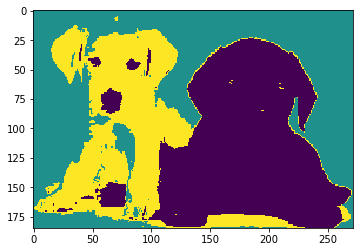

In [73]:
labels=model.predict(imp_np)
labels=labels.reshape(185,272)
plt.imshow(labels)

In [74]:
centers = [centers.astype(int) for centers in model.cluster_centers_]

array([[210.47150599, 174.81721136, 143.77204796],
       [251.54389765, 247.64181736, 243.03339546],
       [ 29.52342938,  21.58259063,  20.44042867]])

In [75]:
blob = np.ones((100,100,3))

In [76]:
blob

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [77]:
blob1 = blob * centers[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


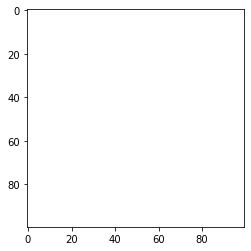

In [78]:
plt.imshow(blob1)

In [79]:
blob2=blob * centers[1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


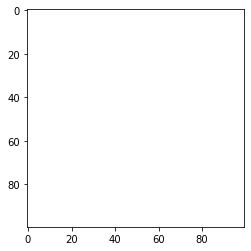

In [81]:
plt.imshow(blob2)

In [91]:
model.labels_.shape

(50320,)

In [92]:
model.cluster_centers_.shape

(3, 3)

In [93]:
pixel_centroids=model.labels_
cluster_center=model.cluster_centers_

IndexError: index 3 is out of bounds for axis 0 with size 3

In [107]:
final_zeros=np.zeros((pixel_centroids.shape[0],3))
for cluster_no in range(3):
    final_zeros[pixel_centroids==cluster_no]=cluster_center[cluster_no]
final_zeros.shape

(50320, 3)

In [98]:
comp_image=final_zeros.reshape(imp_np.shape[0],imp_np.shape[1],imp_np.shape[2]) #Compressed Image obtained from kmeans model
comp_image.shape

(185, 272, 3)

In [99]:
comp_image=Image.fromarray(np.uint8(comp_image)) #Building an image from an numpy array
comp_image.save('dogs_compressed.jpeg')

In [100]:
img1=mpimg.imread('dogs.jpeg')
img2=mpimg.imread('dogs_compressed.jpeg')

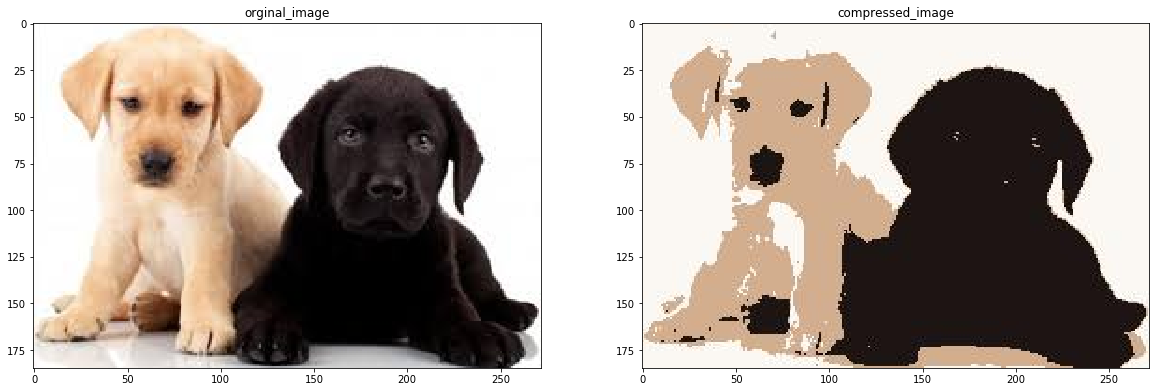

In [112]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
ax1.imshow(img1)
ax1.set_title('orginal_image')
ax2.imshow(img2)
ax2.set_title('compressed_image')
plt.show()